### Import modules and basic settings

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Import data and inspect it

In [135]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/25/2019 02:00:00 PM,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)"
3,01/27/2019 09:00:00 PM,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,02/07/2019 04:00:00 AM,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [136]:
print('dimensions of data:',df.shape)

dimensions of data: (16057, 12)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
hour_beginning       16057 non-null object
location             16057 non-null object
Pedestrians          16057 non-null int64
Towards Manhattan    16057 non-null int64
Towards Brooklyn     16057 non-null int64
weather_summary      16041 non-null object
temperature          16041 non-null float64
precipitation        16041 non-null float64
lat                  16057 non-null float64
long                 16057 non-null float64
events               1124 non-null object
Location1            16057 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


### I can see that some columns are completely filled but 3 columns have some data missing and events column has a lot of entries missing. But that makes sense since you don't have an event everyday

In [138]:
df.loc[0,'hour_beginning']

'04/30/2019 12:00:00 AM'

### The above seems like something pandas will be able to parse as time! Also, it has no missing values. I will try to convert it to datetime

In [139]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

### Successful transformation! This means that all entries in 'hour_beginning' column were of correct format :) 

In [140]:
# Sorting data
df.sort_values(by='hour_beginning')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
8854,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9481,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10106,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10741,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
11535,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8938,2017-10-01 05:00:00,Brooklyn Bridge,16,12,4,partly-cloudy-night,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9518,2017-10-01 06:00:00,Brooklyn Bridge,113,88,25,partly-cloudy-night,49.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10507,2017-10-01 07:00:00,Brooklyn Bridge,199,72,127,clear-day,49.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
11347,2017-10-01 08:00:00,Brooklyn Bridge,261,133,128,clear-day,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9851,2017-10-01 09:00:00,Brooklyn Bridge,845,504,341,clear-day,54.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)"
3,2019-01-27 21:00:00,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-02-07 04:00:00,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [141]:
# Extracting more potentially meaningful data

df['hour'] = df['hour_beginning'].dt.hour
df['day_name'] = df['hour_beginning'].dt.day_name()
df['date'] = df['hour_beginning'].dt.date
df['month'] = df['hour_beginning'].dt.month

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,day_name,date,month
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,Tuesday,2019-04-30,4
1,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,Monday,2019-04-01,4
2,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",14,Wednesday,2019-12-25,12
3,2019-01-27 21:00:00,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,Sunday,2019-01-27,1
4,2019-02-07 04:00:00,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,Thursday,2019-02-07,2


### This was covered in class. We checked for missing time slots. I will do some additional analysis of my own here

In [142]:
min_dt = min(df['hour_beginning'])
max_dt = max(df['hour_beginning'])

expected_range = pd.date_range(start=min_dt,end=max_dt,freq='H')

print("length of expected range:",len(expected_range))
print("length of actual range:",len(df))

length of expected range: 19728
length of actual range: 16057


In [143]:
missing_hours = expected_range.difference(df['hour_beginning'])
print("number of missing time slots:",len(missing_hours))

number of missing time slots: 3672


### I am now checking whether missing data is continuous or not

In [144]:
from itertools import groupby

# group by counts per date
missing_data_counts = {key:len(list(group)) for key,group in groupby(missing_hours.date)}

In [145]:
import pprint
pprint.pprint(missing_data_counts)

{datetime.date(2018, 8, 1): 24,
 datetime.date(2018, 8, 2): 24,
 datetime.date(2018, 8, 3): 24,
 datetime.date(2018, 8, 4): 24,
 datetime.date(2018, 8, 5): 24,
 datetime.date(2018, 8, 6): 24,
 datetime.date(2018, 8, 7): 24,
 datetime.date(2018, 8, 8): 24,
 datetime.date(2018, 8, 9): 24,
 datetime.date(2018, 8, 10): 24,
 datetime.date(2018, 8, 11): 24,
 datetime.date(2018, 8, 12): 24,
 datetime.date(2018, 8, 13): 24,
 datetime.date(2018, 8, 14): 24,
 datetime.date(2018, 8, 15): 24,
 datetime.date(2018, 8, 16): 24,
 datetime.date(2018, 8, 17): 24,
 datetime.date(2018, 8, 18): 24,
 datetime.date(2018, 8, 19): 24,
 datetime.date(2018, 8, 20): 24,
 datetime.date(2018, 8, 21): 24,
 datetime.date(2018, 8, 22): 24,
 datetime.date(2018, 8, 23): 24,
 datetime.date(2018, 8, 24): 24,
 datetime.date(2018, 8, 25): 24,
 datetime.date(2018, 8, 26): 24,
 datetime.date(2018, 8, 27): 24,
 datetime.date(2018, 8, 28): 24,
 datetime.date(2018, 8, 29): 24,
 datetime.date(2018, 8, 30): 24,
 datetime.date(2018

### I can see that missing data for every day is round the clock. For every day, all 24 hours of data seems to be missing

In [146]:
# find difference in missing data
delta = max(missing_data_counts) - min(missing_data_counts)

print("difference in days of min data and max date:",delta.days)
print("actual length of missing data:",len(missing_data_counts))

difference in days of min data and max date: 152
actual length of missing data: 153


### Conclusion: The above implies that missing data is continuous. So all data between August, 2018 and December, 2018 is missing!




## I will now make some plots to understand the data.

In [164]:
df.set_index('hour_beginning',inplace=True)
df.sort_index(inplace=True)

In [165]:
df.head()

,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,day_name,date,month
hour_beginning,,,,,,,,,,,,,,,
2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,Sunday,2017-10-01,10
2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,Sunday,2017-10-01,10
2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,Sunday,2017-10-01,10
2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,Sunday,2017-10-01,10
2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,Sunday,2017-10-01,10


In [209]:

def makeScatterPlot(start,end,column):
    seriesSlice = df.loc[start:end][column]
    x = np.arange(len(seriesSlice))
    y = list(seriesSlice)
    plt.scatter(x,y)
    
def makeLinePlot(start,end,column):
    seriesSlice = df.loc[start:end][column]
    x = np.arange(len(seriesSlice))
    y = list(seriesSlice)
    plt.plot(x,y)

### Let's check the traffic trend on 1st October, 2017 and a couple of subsequent days

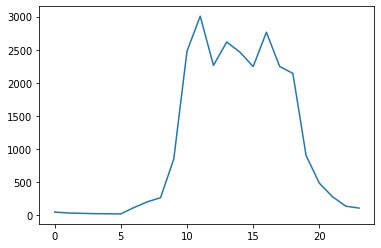

In [213]:
makeLinePlot('2017-10-01','2017-10-01','Pedestrians')

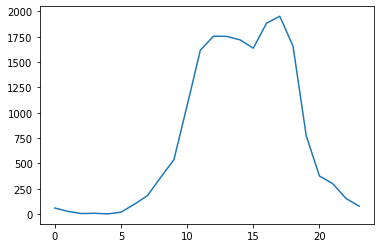

In [216]:
makeLinePlot('2017-10-02','2017-10-02','Pedestrians')

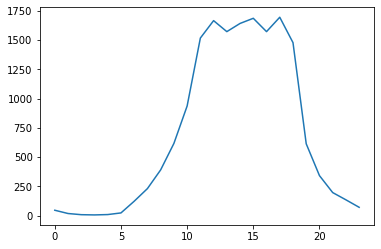

In [217]:
makeLinePlot('2017-10-03','2017-10-03','Pedestrians')

### I can see a trend here! Seems like New Yorkers start getting on the streets by 11 and the streets keep busy till 7 or so, but the crowd starts reducing after that. It makes sense too! Seems like there is no timezone issue (or is there?).

### I am now trying the sns pairwise plot to see frequency distribution here

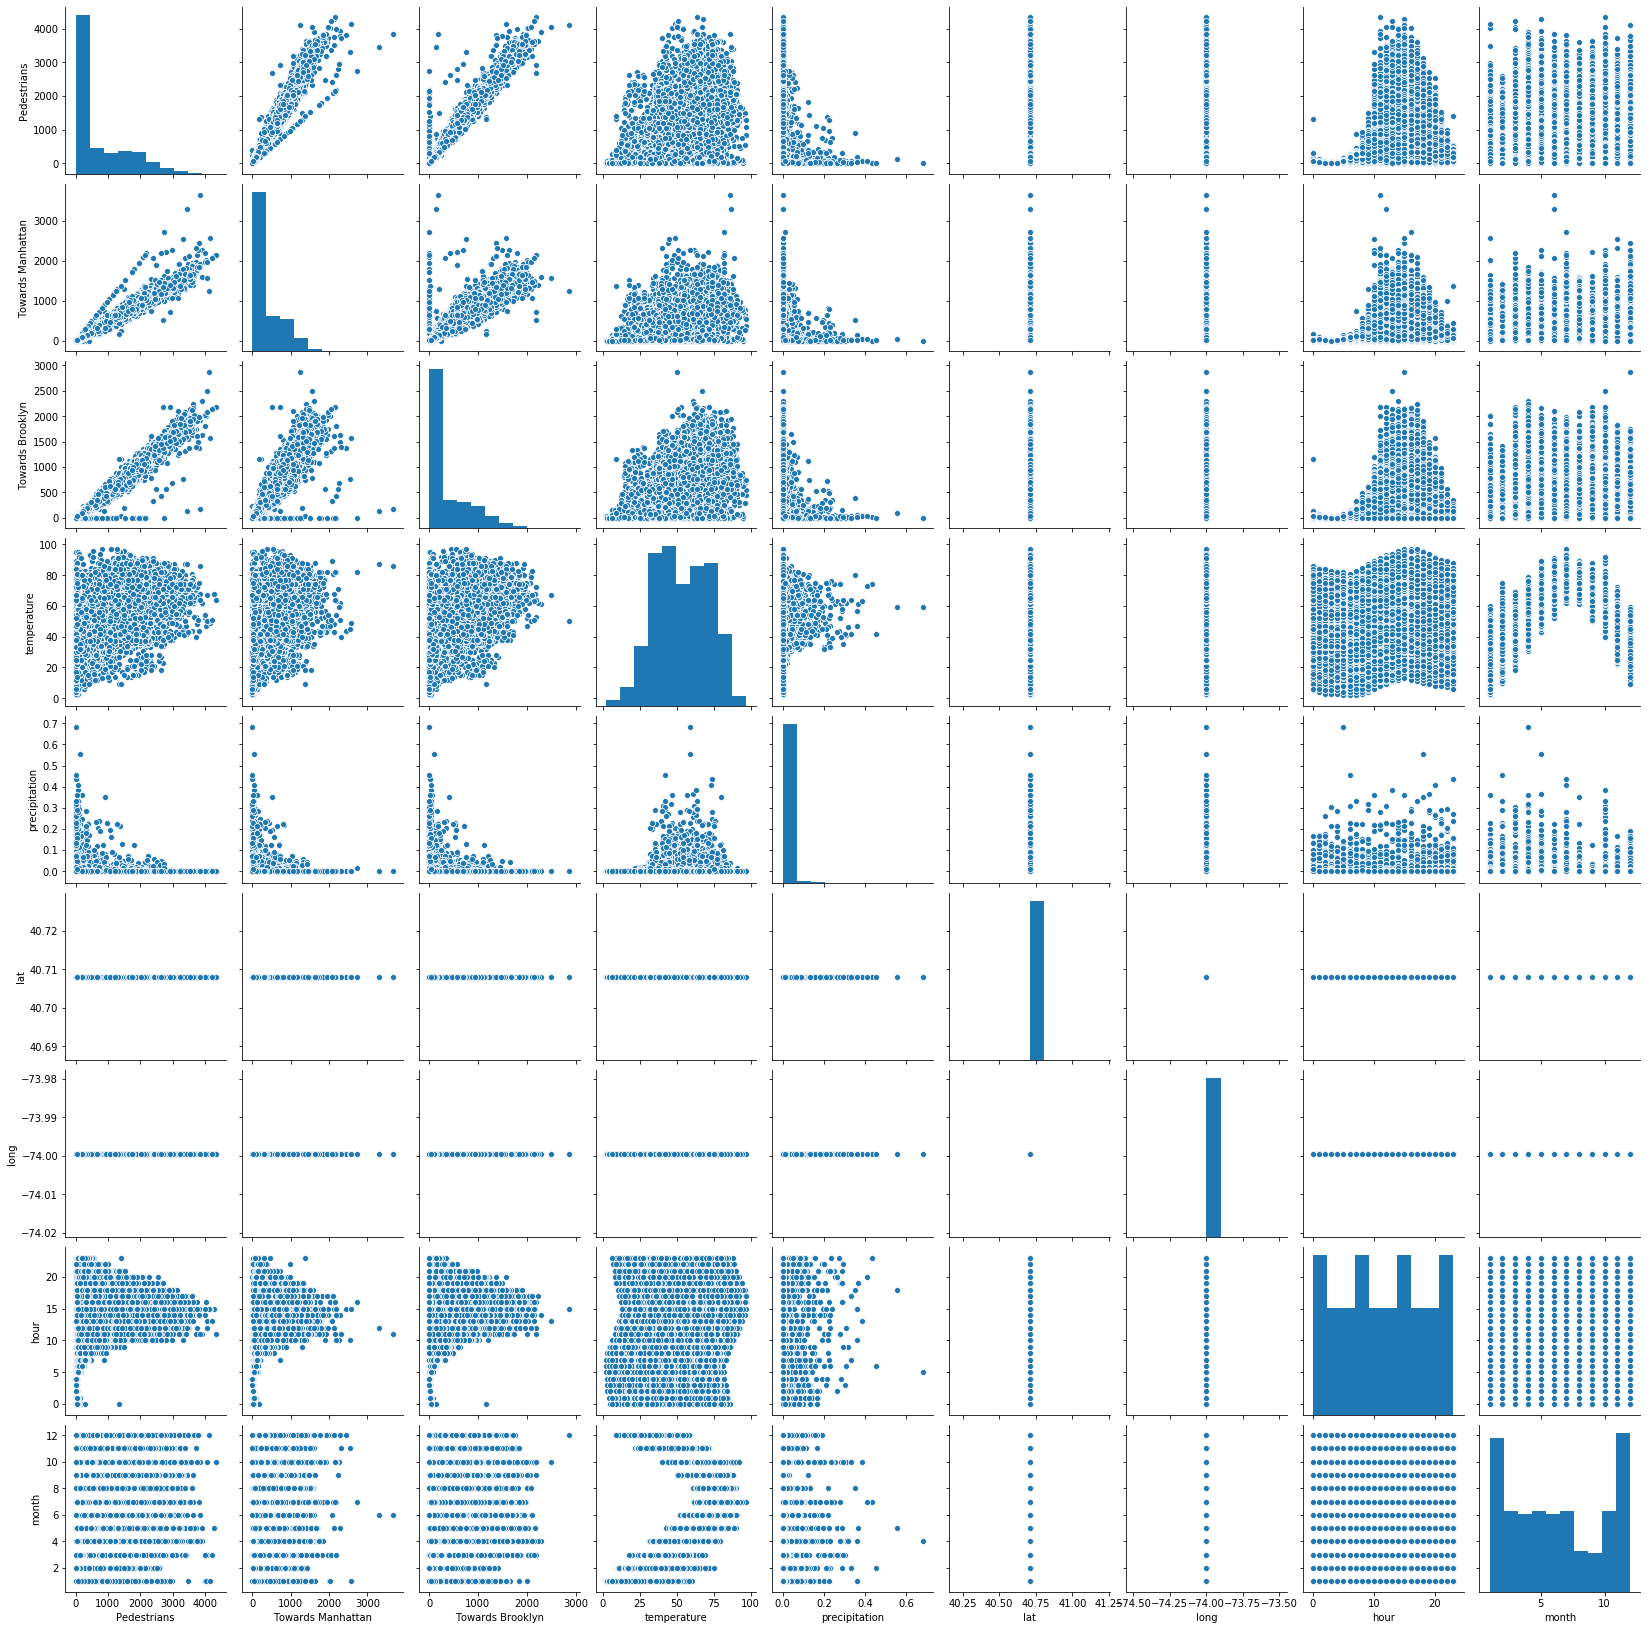

In [161]:
sns.pairplot(df)

In [218]:
df.columns

Index(['location', 'Pedestrians', 'Towards Manhattan', 'Towards Brooklyn',
       'weather_summary', 'temperature', 'precipitation', 'lat', 'long',
       'events', 'Location1', 'hour', 'day_name', 'date', 'month'],
      dtype='object')

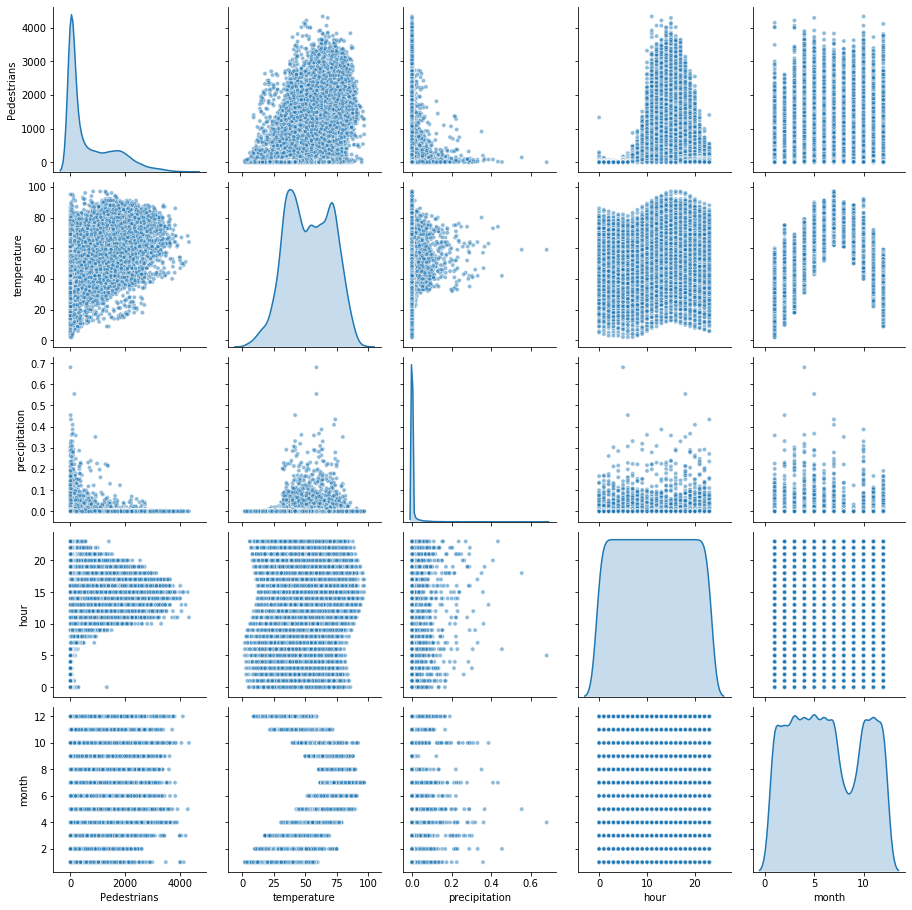

In [222]:
sns.pairplot(df, 
             vars=['Pedestrians', 'temperature', 'precipitation', 'hour', 'month'],
             diag_kind = 'kde',
             plot_kws={'alpha':0.5, 'size': 0.1})

### Only thing remaining: Aggregate statistics